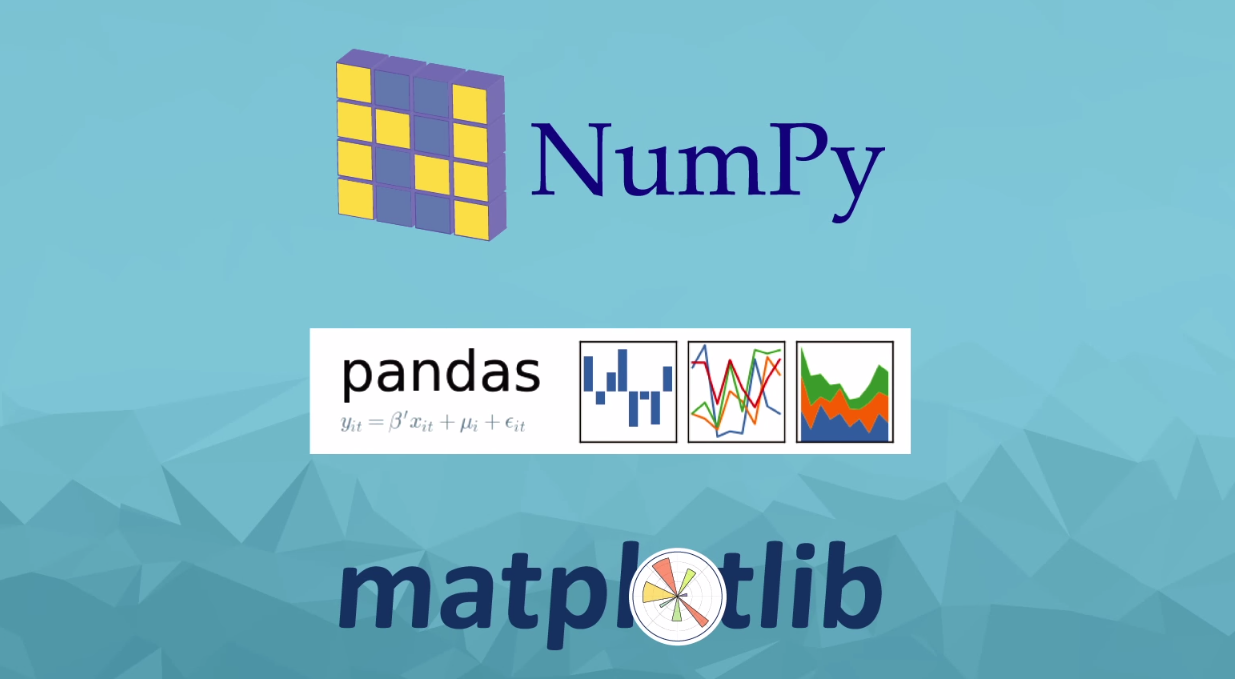

# Project: Medical Appointments No Shows - Data Investigation


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will analyzing the medical appointments no shows dataset. This dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

The Dataset content 14 characteristics about the patient. The description below is the meaning of each characteristic :  

* **PatientId :**   
    *The ID of patient*
* **AppointmentID :**  
    *The ID of appointment*
* **Gender**  
    *the gender of patient, Female or Male.*
* **ScheduledDay :**   
    *The day that the patient set up an appointement*
* **AppointmentDay :**  
    *The day of the appointment.*
* **Age :**  
    *The age of patient*
* **Neighbourhood :**  
    *Where the appointment takes place.*
* **Scholarship :**  
    *Whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Value : True/False*
* **Hipertension :**  
    *Whetther or not the patient have a hipertension. Values : True/False*
* **Diabetes :**  
    *Whetther or not the patient have a Diabetes. Values : True/False*
* **Alcoholism**  
    *Whetther or not the patient is a Alcoholism. Values : True/False*
* **Handcap**  
    *Whetther or not the patient is a Handcap. Values : True/False*
* **SMS_received :**  
    *Number of message sent to the patient.*
* **No-show :**  
    *‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.*  



Below the questions that can help us the explore this dateset : 

* **Question 1 :** What's the percentage of patient that show up for their appointment ?  
* **Question 2 :** Does the gender affect the patient's show up ?  
* **Question 3 :** Does the age affect the patient's show up ?  
* **Question 4 :** Who care most for their health, Female or Male, old age or youth ?  
* **Question 5 :** Does having a Scholarship affect the patient's show up ?  
* **Question 6 :** How the diseases impact the patient's show up ?  
* **Question 7 :** Does Neighborhood affect the patient's show up ?  
* **Question 8 :** Does Receiving SMS affect the patient's show up ?  
* **Question 9 :** Does the time between schedule day and appointment day affect the patient's show up ?

## Packages

In [1]:
# Import package that we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### Assessing

In [2]:
# Load Data
df = pd.read_csv('noshow_appointments.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [3]:
df.shape

(110527, 14)

In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [9]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

**Data Quality and Structure synthesis :**  
     
   * *We don't have a missing data issue nor duplicated issue.*  
   * *The type of columns **"ScheduledDay"** and **"AppointmentDay"** is object instead of Datetime.*  
   * *Age have a negative value : -1.*   
   * *The hypthen used in the columns **"No-show"** May caused problem with pandas function query and the values could be confusion.*
  

Let's fixe this problems to get a cleaning Data.

### Data Cleaning

>Change the type of columns **"ScheduledDay"** and **"AppointmentDay"** to Datetime.

In [10]:
#make a copy of dataframe df
df_clean = df.copy()

In [11]:
#change the type to datetime
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])

Let's check

In [12]:
#check the types of columns ScheduledDay and AppointmentDay
df_clean.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

> Drop the negative age row.

In [13]:
#Delete the age row where age = -1
df_clean.drop(df_clean.query('Age < 0').index[0], axis=0, inplace=True)

Let's check

In [14]:
#check the number of row 
df_clean.shape

(110526, 14)

In [15]:
#check if dataframe still have row with negative age value
df_clean.query('Age<0')

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

> Rename the columns **"No-show"** by **Patient_Showed** and Reverse the values.

In [16]:
#Rename the columns No-show by Patient_Showed
df_clean.rename(columns={"No-show":"Patient_Showed"}, inplace=True)

Let's check

In [17]:
#Check if name is changed 
df_clean.head(1)

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   

             AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received Patient_Showed  
0         0           0        0             0             No

In [18]:
#Reverce the values of column Patient_Showed, replacing Yes by No and No by Yes 
df_clean['Patient_Showed'] = df_clean['Patient_Showed'].apply(lambda x: 'Yes' if x=='No' else 'No')
df_clean

PatientId  AppointmentID Gender              ScheduledDay  \
0       2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1       5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2       4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3       8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4       8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   
...              ...            ...    ...                       ...   
110522  2.572134e+12        5651768      F 2016-05-03 09:15:35+00:00   
110523  3.596266e+12        5650093      F 2016-05-03 07:27:33+00:00   
110524  1.557663e+13        5630692      F 2016-04-27 16:03:52+00:00   
110525  9.213493e+13        5630323      F 2016-04-27 15:09:23+00:00   
110526  3.775115e+14        5629448      F 2016-04-27 13:30:56+00:00   

                  AppointmentDay  Age      Neighbourhood  Scholarship  \
0      2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1      2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2      2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3      2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4      2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
...                          ...  ...                ...          ...   
110522 2016-06-07 00:00:00+00:00   56        MARIA ORTIZ            0   
110523 2016-06-07 00:00:00+00:00   51        MARIA ORTIZ            0   
110524 2016-06-07 00:00:00+00:00   21        MARIA ORTIZ            0   
110525 2016-06-07 00:00:00+00:00   38        MARIA ORTIZ            0   
110526 2016-06-07 00:00:00+00:00   54        MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0                  1         0           0        0             0   
1                  0         0           0        0             0   
2                  0         0           0        0             0   
3                  0         0           0        0             0   
4                  1         1           0        0             0   
...              ...       ...         ...      ...           ...   
110522             0         0           0        0             1   
110523             0         0           0        0             1   
110524             0         0           0        0             1   
110525             0         0           0        0             1   
110526             0         0           0        0             1   

       Patient_Showed  
0                 Yes  
1                 Yes  
2                 Yes  
3                 Yes  
4                 Yes  
...               ...  
110522            Yes  
110523            Yes  
110524            Yes  
110525            Yes  
110526            Yes  

[110526 rows x 14 columns]

<a id='eda'></a>
## Exploratory Data Analysis



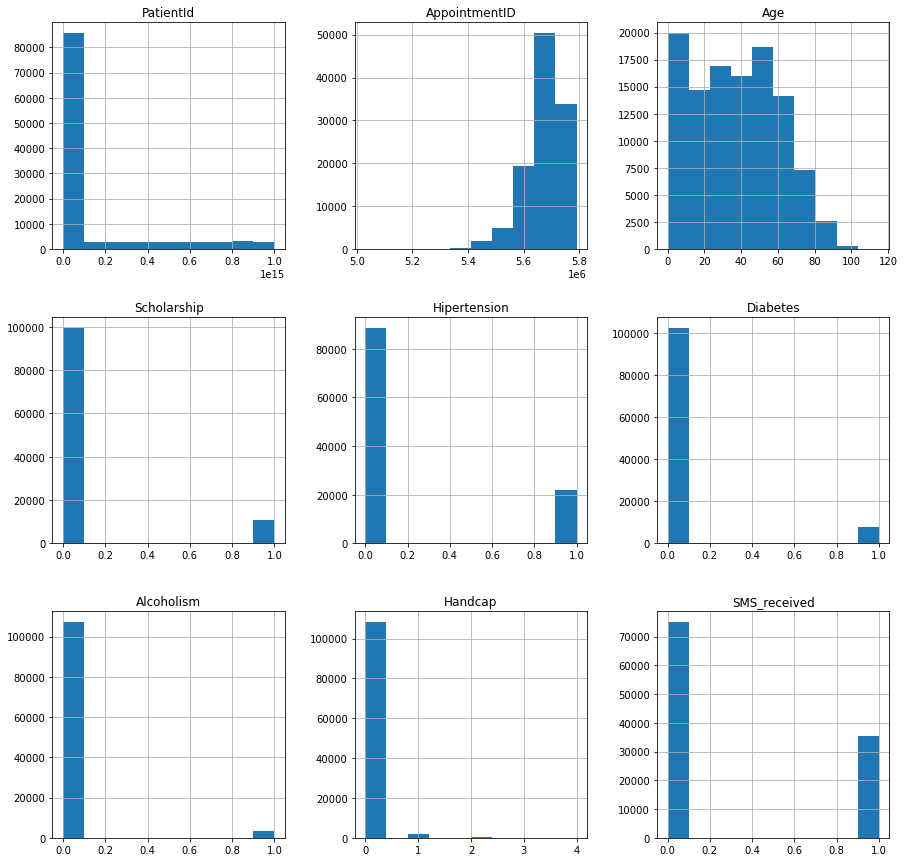

In [19]:
#Plotting histograms
df_clean.hist(figsize=(15,15));

> From the histograms, we can see that the most of patients don't suffer from diseases.  
> And the most of patient don't receive SMS.  
> And The age of the most patients is between 0-80.  
> And the most of patients don't have the Scholarship.

Now let's look more closely at dataset and answer some questions.

> First to avoid repetition, I will create a costumer functions.

In [35]:
#Function to get show up total by a specific column
def get_totalShowup(df, s, cond):
    return df.query(cond).groupby(s)['Patient_Showed'].count() 
#Function to get the column total
def get_total(df, s):
    return df.groupby(s)['Patient_Showed'].count().sum()


### Question 1 : What's the percentage of patient that show up for their appointment ?

In [21]:
#Make a copy of dataframe df_clean
df_Q1 = df_clean.copy()
df_Q1.head(1)

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   

             AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received Patient_Showed  
0         0           0        0             0            Yes

In [22]:
#Get total of appointment
total_appoint = df_Q1['AppointmentID'].count()
total_appoint

110526

In [23]:
#Total for Show up/No show up
total_no = df_Q1.query('Patient_Showed == "No"')['AppointmentID'].count()
total_yes = df_Q1.query('Patient_Showed == "Yes"')['AppointmentID'].count()
print(total_no)
print(total_yes)

22319
88207


In [25]:
prop_no = total_no/total_appoint
prop_yes = total_yes/total_appoint
print(prop_no)
print(prop_yes)

0.20193438647919945
0.7980656135208005


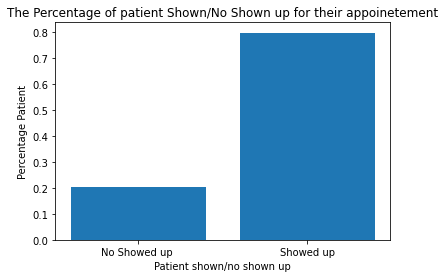

In [26]:
#Plotting the percentage of patient show up/No show up
plt.bar([1,2], [prop_no, prop_yes], tick_label=['No Showed up ', 'Showed up'])
plt.title('The Percentage of patient Shown/No Shown up for their appoinetement')
plt.xlabel('Patient shown/no shown up')
plt.ylabel('Percentage Patient');

> 79.8% of patient are shown up for their medical appointments while 20.2% of patient didn't show up.

### Question 2 : Does the gender affect the patient's show up ?

In [27]:
#make a copy
df_Q2 = df_clean.copy()
df_Q2.head(2)

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   

             AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   
1 2016-04-29 00:00:00+00:00   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received Patient_Showed  
0         0           0        0             0            Yes  
1         0           0        0             0            Yes

In [28]:
df_Q2['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [29]:
df_gender = df_Q2.groupby(['Patient_Showed', 'Gender'])['Gender'].count()
df_gender 

Patient_Showed  Gender
No              F         14594
                M          7725
Yes             F         57245
                M         30962
Name: Gender, dtype: int64

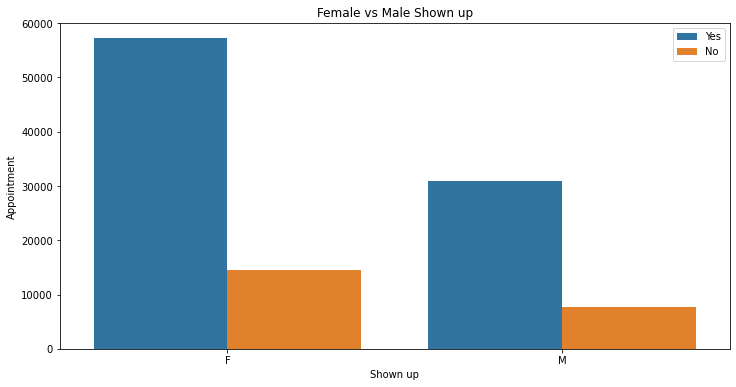

In [32]:
#Plotting the patient's show up by Gender
plt.figure(figsize=(12,6))
sn.countplot(x=df_Q2['Gender'], hue=df_Q2['Patient_Showed'], data=df_Q2)
plt.title('Female vs Male Shown up')
plt.xlabel('Shown up')
plt.ylabel('Appointment')
plt.legend();

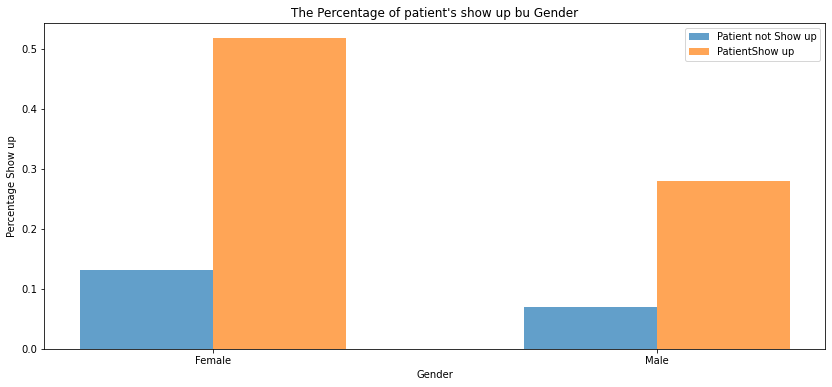

In [36]:
#Plotting the percentage show up/No show up by Gender
total_gender = get_total(df_Q2, 'Gender')
prop_no2 = get_totalShowup(df_Q2, 'Gender', 'Patient_Showed == "No"')/total_gender
prop_yes2 = get_totalShowup(df_Q2, 'Gender', 'Patient_Showed == "Yes"')/total_gender
local_Q2 = np.arange(len(prop_yes2))
width = 0.3
plt.figure(figsize=(14,6))
plt.bar(local_Q2, prop_no2, width, alpha=.7, label='Patient not Show up')
plt.bar(np.add(local_Q2, width), prop_yes2, width, alpha=.7, label='PatientShow up')
ind = local_Q2 + width/2
label = ['Female', 'Male']
plt.title("The Percentage of patient's show up bu Gender")
plt.xlabel('Gender')
plt.ylabel('Percentage Show up')
plt.xticks(ind, label)
plt.legend();

> From the charts above, we can conclue that Female are the most patients who show up to their medical appointment.

### Question 3 : Does the age affect the patient's show up ?

In [37]:
#Make a copy of df_clean
df_Q3 = df_clean.copy()
df_Q3.head(2)

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   

             AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   
1 2016-04-29 00:00:00+00:00   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received Patient_Showed  
0         0           0        0             0            Yes  
1         0           0        0             0            Yes

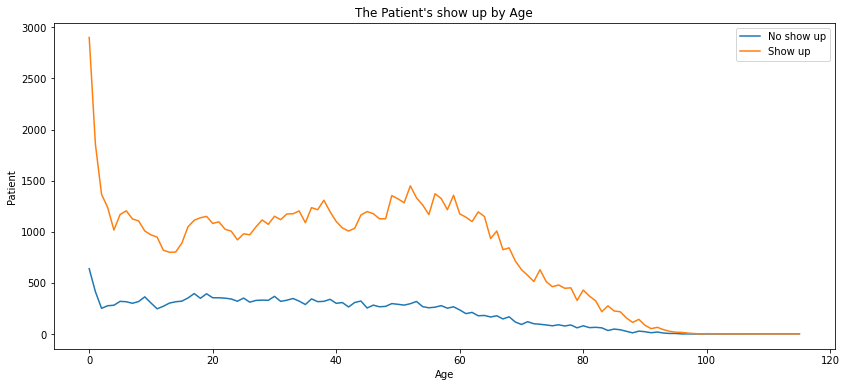

In [38]:
#Plotting patient's show up by Age
get_totalShowup(df_Q3, 'Age', 'Patient_Showed == "No"').plot(kind='line', label='No show up', figsize=(14,6))
get_totalShowup(df_Q3, 'Age', 'Patient_Showed == "Yes"').plot(kind='line',label='Show up', figsize=(14,6))
plt.title("The Patient's show up by Age")
plt.xlabel('Age')
plt.ylabel('Patient')
plt.legend();

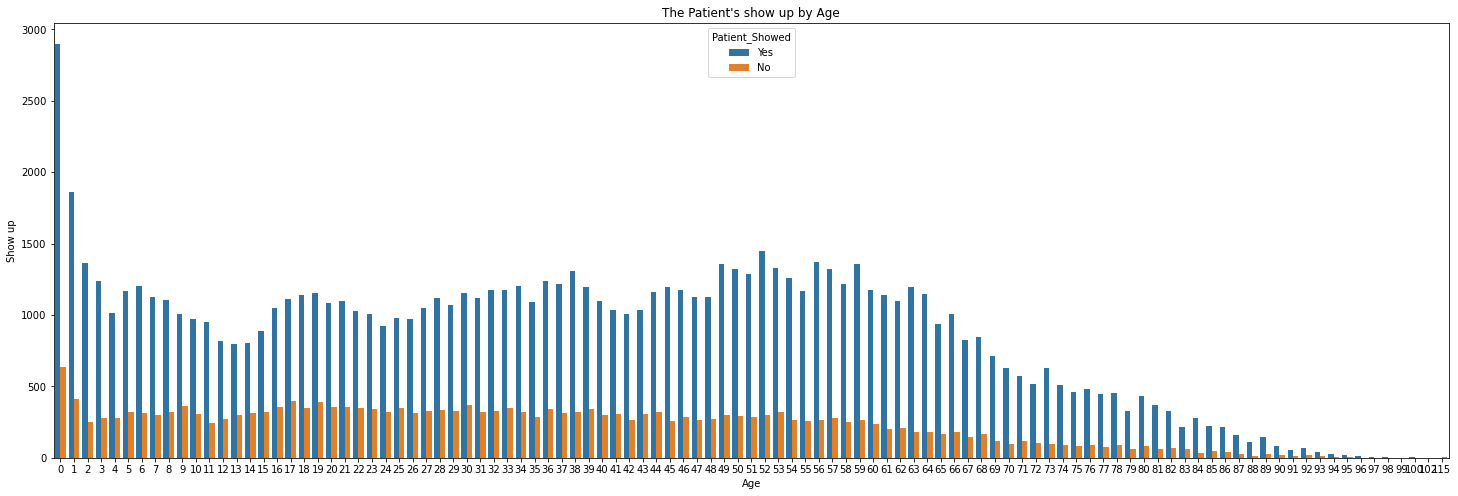

In [39]:
plt.figure(figsize=(25,8))
sn.countplot(x=df_Q3['Age'], hue=df_Q3['Patient_Showed'], data=df_Q3)
plt.title("The Patient's show up by Age")
plt.ylabel('Show up');

> The shown up variable is descrease while the age increase, also the patients with age between 0-2 and 49-59 are the most patient who shown up for their medical appointment.

### Question 4 : Who care most for their health, Female or Male, old age or youth ?

In [40]:
#Make a copy 
df_Q4 = df_clean.copy()
df_Q4.head(2)

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   

             AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   
1 2016-04-29 00:00:00+00:00   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received Patient_Showed  
0         0           0        0             0            Yes  
1         0           0        0             0            Yes

In order to more visualize the relation between age and show up variable, I will create **age_segment** a categorical variable from the column Age.

In [41]:
df_Q4['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [42]:
#Create age_segment
bin_segment = [0, 18, 37, 45, 65, 85, 95, 115]
bin_names = ['0-18', '18-37', '37-45', '45-65', '65-85', '85-95', '95-115']
df_Q4['age_segment'] = pd.cut(df_Q4['Age'], bin_segment, labels=bin_names)
df_Q4.head()

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received Patient_Showed  \
0             1         0           0        0             0            Yes   
1             0         0           0        0             0            Yes   
2             0         0           0        0             0            Yes   
3             0         0           0        0             0            Yes   
4             1         1           0        0             0            Yes   

  age_segment  
0       45-65  
1       45-65  
2       45-65  
3        0-18  
4       45-65

In [43]:
#Check if we don't have a null value
df_Q4['age_segment'].isnull().sum()

3539

In [44]:
df_Q4[df_Q4['age_segment'].isnull()].groupby('Age').count()

PatientId  AppointmentID  Gender  ScheduledDay  AppointmentDay  \
Age                                                                   
0         3539           3539    3539          3539            3539   

     Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
Age                                                                            
0             3539         3539          3539      3539        3539     3539   

     SMS_received  Patient_Showed  age_segment  
Age                                             
0            3539            3539            0

the 3539 null values are the rows where the Age = 0. To fix that, I will replacing the null value by the segment [0-18].

In [45]:
df_Q4.loc[df_Q4['age_segment'].isnull(), 'age_segment'] = "0-18"

In [46]:
#check the null values
df_Q4['age_segment'].isnull().sum()

0

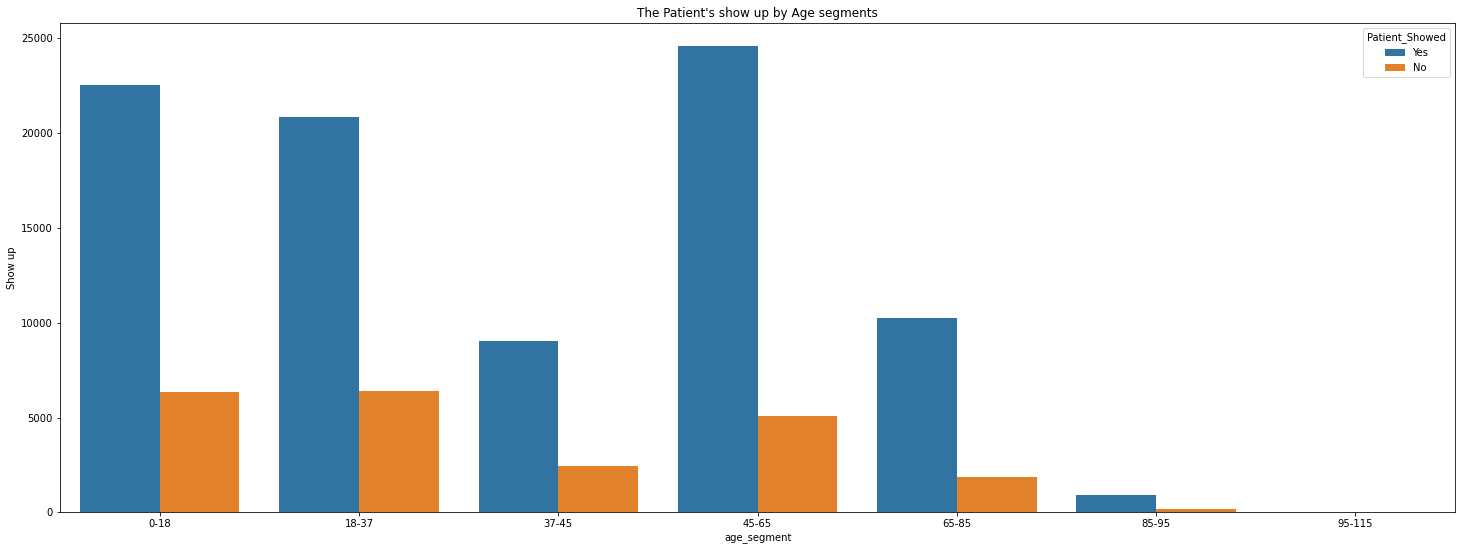

In [47]:
#Plotting the patient's show up by Age Segment
plt.figure(figsize=(25,9))
sn.countplot(x=df_Q4['age_segment'], hue=df_Q4['Patient_Showed'], data=df_Q4)
plt.title("The Patient's show up by Age segments")
plt.ylabel('Show up');

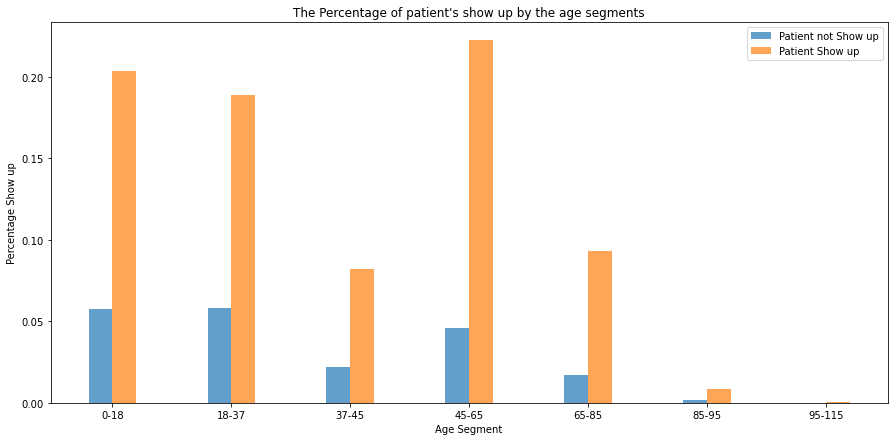

In [48]:
#plotting the Percentage age by age segments
total_age = get_total(df_Q4, 'age_segment')
df_no4 = get_totalShowup(df_Q4, 'age_segment', 'Patient_Showed == "No"')/total_age
df_yes4 = get_totalShowup(df_Q4, 'age_segment', 'Patient_Showed == "Yes"')/total_age
local_Q4 = np.arange(len(df_no4))
width = 0.2
plt.figure(figsize=(15,7))
plt.bar(local_Q4, df_no4, width, alpha=.7, label='Patient not Show up')
plt.bar(np.add(local_Q4, 0.2), df_yes4, width, alpha=.7, label='Patient Show up')
ind = local_Q4 + width/2
labels = df_no4.index
plt.title("The Percentage of patient's show up by the age segments")
plt.xlabel('Age Segment')
plt.ylabel('Percentage Show up')
plt.xticks(ind, labels)
plt.legend();

> The charts show that patients with age between [45-65] are the most patients who care to their health. and young patient [18-37] are less care to their health.

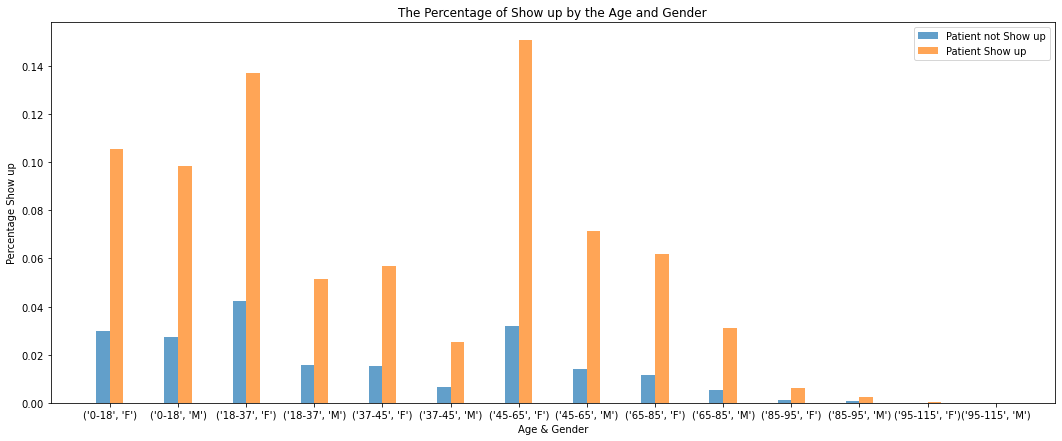

In [49]:
#Plotting the patient's show up by Age Segment and Gender
total_agender = get_total(df_Q4, ['age_segment', 'Gender'])
df_no04 = get_totalShowup(df_Q4, ['age_segment', 'Gender'], 'Patient_Showed == "No"')/total_agender
df_yes04 = get_totalShowup(df_Q4, ['age_segment', 'Gender'], 'Patient_Showed == "Yes"')/total_agender
local_agender = np.arange(len(df_no04))
width = 0.2
plt.figure(figsize=(18,7))
plt.bar(local_agender, df_no04, width, alpha=.7, label='Patient not Show up')
plt.bar(np.add(local_agender, width), df_yes04, width, alpha=.7, label='Patient Show up')
ind = local_agender + width/2
labels = df_yes04.index
plt.title('The Percentage of Show up by the Age and Gender')
plt.xlabel('Age & Gender')
plt.ylabel('Percentage Show up')
plt.xticks(ind, labels)
plt.legend();

> The old Female with age semgment [45-65] are more care the their health, they have the greater number of show up for their medical appointment.

### Question 5 : Does having a Scholarship affect the patient's show up ?

In [50]:
# Make a copy of df_clean
df_Q5 = df_clean.copy()
df_Q5.head(2)

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   

             AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   
1 2016-04-29 00:00:00+00:00   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received Patient_Showed  
0         0           0        0             0            Yes  
1         0           0        0             0            Yes

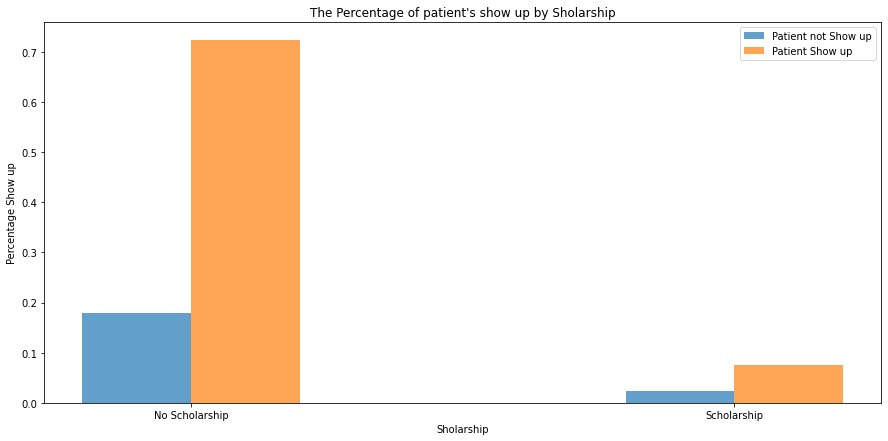

In [51]:
#Poltting the Percentage of patient's show up by Sholarship
total_schol = get_total(df_Q5, 'Scholarship')
df_no5 = get_totalShowup(df_Q5, 'Scholarship', 'Patient_Showed == "No"')/total_schol
df_yes5 = get_totalShowup(df_Q5, 'Scholarship', 'Patient_Showed == "Yes"')/total_schol
local_Q5 = np.arange(len(df_no5))
width = 0.2
plt.figure(figsize=(15,7))
plt.bar(local_Q5, df_no5, width, alpha=.7, label='Patient not Show up')
plt.bar(np.add(local_Q5, width), df_yes5, width, alpha=.7, label='Patient Show up')
ind = local_Q5 + width/2
labels = ['No Scholarship', 'Scholarship']
plt.title("The Percentage of patient's show up by Sholarship")
plt.xlabel('Sholarship')
plt.ylabel('Percentage Show up')
plt.xticks(ind, labels)
plt.legend();

> The chart above show that patients who don't have scholship show up to their medical appointment more than patien who have scholarship. 

### Question 6 : How the diseases impact the Show up vavriable ?

In [52]:
df_Q6 = df_clean.copy()
df_Q6.head(2)

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   

             AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   
1 2016-04-29 00:00:00+00:00   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received Patient_Showed  
0         0           0        0             0            Yes  
1         0           0        0             0            Yes

In [53]:
df_disease = df_Q6[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Patient_Showed']]
df_disease

Hipertension  Diabetes  Alcoholism  Handcap Patient_Showed
0                  1         0           0        0            Yes
1                  0         0           0        0            Yes
2                  0         0           0        0            Yes
3                  0         0           0        0            Yes
4                  1         1           0        0            Yes
...              ...       ...         ...      ...            ...
110522             0         0           0        0            Yes
110523             0         0           0        0            Yes
110524             0         0           0        0            Yes
110525             0         0           0        0            Yes
110526             0         0           0        0            Yes

[110526 rows x 5 columns]

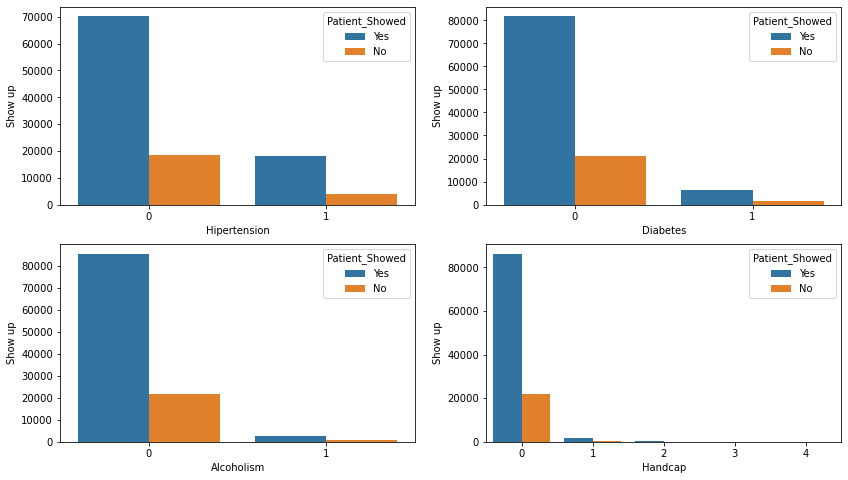

In [54]:
#Plotting the patient's show up by Diseases type
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sn.countplot(x=df_disease['Hipertension'], hue=df_disease['Patient_Showed'], data=df_disease)
plt.ylabel('Show up')
plt.subplot(2,2,2)
sn.countplot(x=df_disease['Diabetes'], hue=df_disease['Patient_Showed'], data=df_disease)
plt.ylabel('Show up')
plt.subplot(2,2,3)
sn.countplot(x=df_disease['Alcoholism'], hue=df_disease['Patient_Showed'], data=df_disease)
plt.ylabel('Show up')
plt.subplot(2,2,4)
sn.countplot(x=df_disease['Handcap'], hue=df_disease['Patient_Showed'], data=df_disease)
plt.ylabel('Show up');

> It seems that patients who don't have diseases are the most who show up for their medical appointment. 

### Question 7 : Does Neighbourhood affect the patient's show up ?

In [55]:
df_Q7 = df_clean.copy()
df_Q7.head(2)

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   

             AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   
1 2016-04-29 00:00:00+00:00   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received Patient_Showed  
0         0           0        0             0            Yes  
1         0           0        0             0            Yes

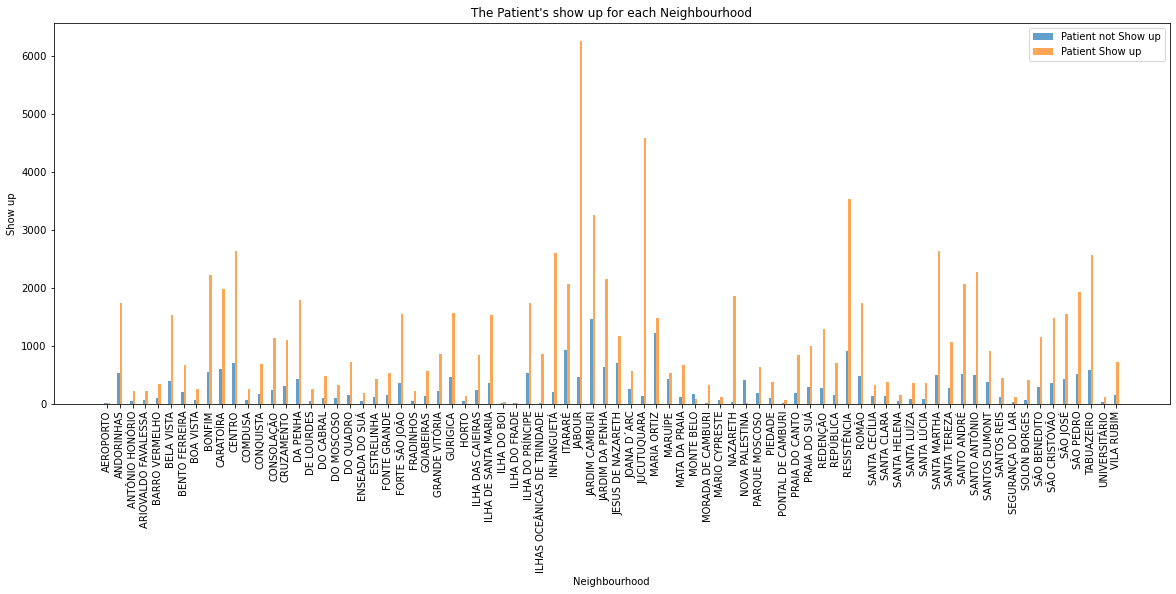

In [56]:
#Plotting the patient's show up by neighbourhood
df_no7 = get_totalShowup(df_Q7, 'Neighbourhood', 'Patient_Showed == "No"')
df_yes7 = get_totalShowup(df_Q7, 'Neighbourhood', 'Patient_Showed == "Yes"')
local_Q7 = np.arange(len(df_no7))
width = 0.2
plt.figure(figsize=(20,7))
plt.bar(local_Q7, df_no7, width, alpha=.7, label='Patient not Show up')
plt.bar(np.add(local_Q7, width), df_yes7, width, alpha=.7, label='Patient Show up')
ind = local_Q7 + width/2
labels = df_no7.index
plt.title("The Patient's show up for each Neighbourhood")
plt.xlabel('Neighbourhood')
plt.ylabel('Show up')
plt.xticks(ind, labels, rotation=90)
plt.legend();

> From the chart we can conclude that Jabour's patients are the most shown up for their medical appointment while Jardim Camburi's patients are less to show up for their appointment.  

> What's the special in this two neighbourhood ?. let's check

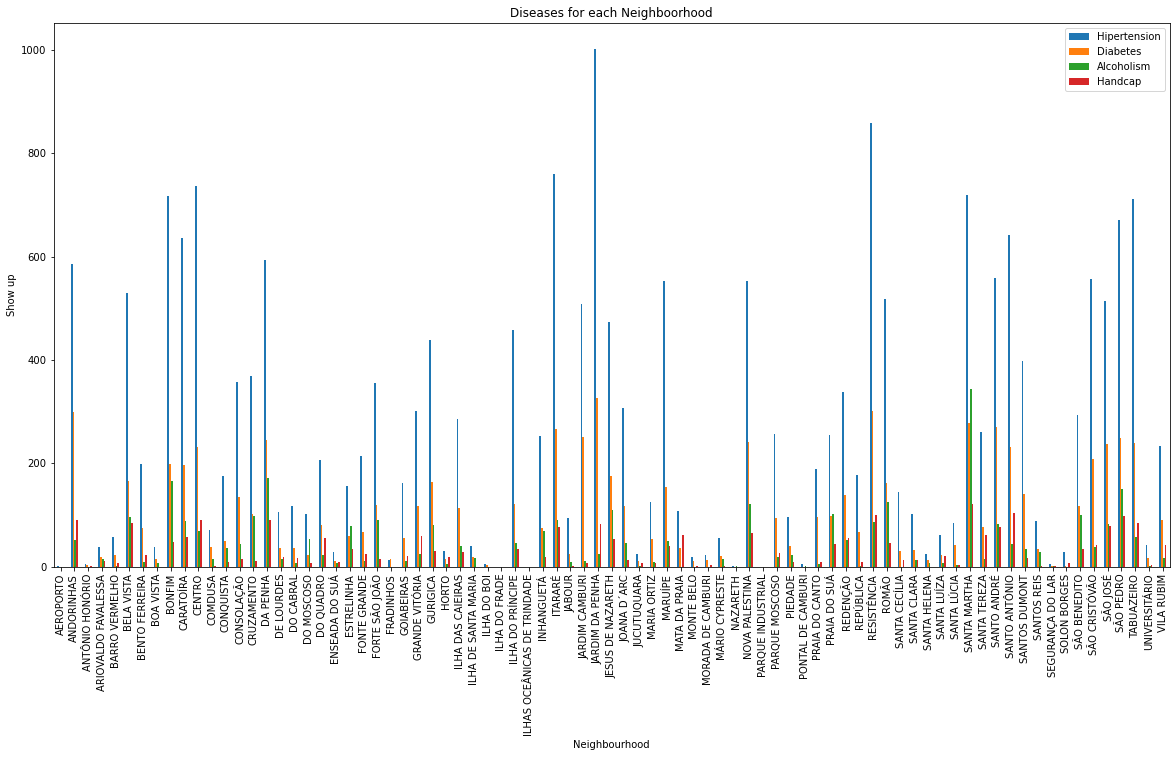

In [57]:
#Plotting Neighboorhood by Diseases 
df_Q7[['Neighbourhood','Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Patient_Showed']].groupby('Neighbourhood').sum().plot(kind='bar', figsize=(20,10))
plt.title('Diseases for each Neighboorhood')
plt.ylabel('Show up');

> Jabour's neighbourhood is one of the neighbourhood where people have less of diseases.

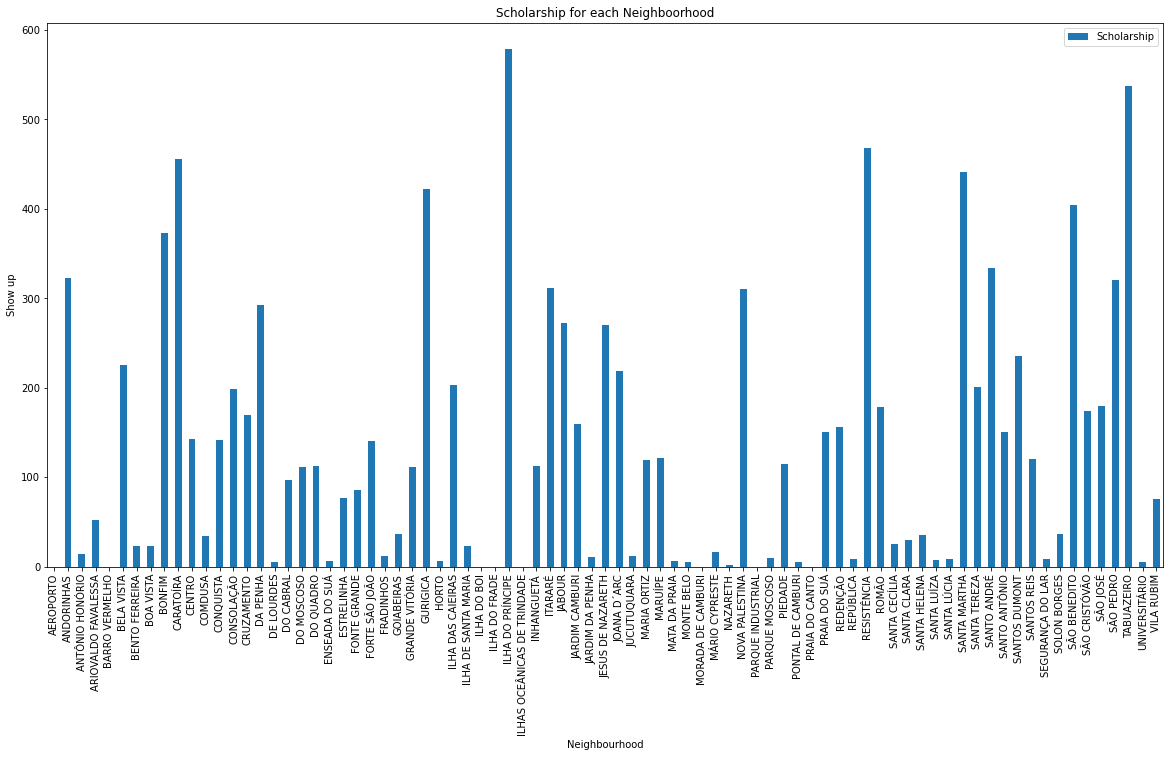

In [58]:
#Plotting Neighboourhood by Scholarship
df_Q7[['Neighbourhood', 'Scholarship', 'Patient_Showed']].groupby('Neighbourhood').sum().plot(kind='bar', figsize=(20,10))
plt.title('Scholarship for each Neighboorhood')
plt.ylabel('Show up');

> Jardim Camburi's neighboorhood is one of neighboorhood where people have less number of scholership.

### Question 8 : Does Receiving SMS affect the patient's show up ?

In [59]:
df_Q8 = df_clean.copy()
df_Q8.head(2)

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   

             AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   
1 2016-04-29 00:00:00+00:00   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received Patient_Showed  
0         0           0        0             0            Yes  
1         0           0        0             0            Yes

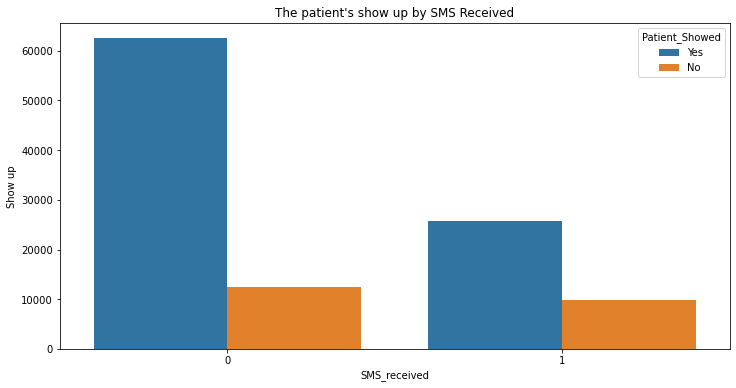

In [60]:
#Plotting the patien's show up by SMS Received
plt.figure(figsize=(12,6))
sn.countplot(x=df_Q8['SMS_received'], hue=df_Q8['Patient_Showed'], data=df_Q8)
plt.title("The patient's show up by SMS Received")
plt.ylabel('Show up');

> Patients who didn't received the SMS shown up more for their medical appointment then patients who received the SMS.

### Question 9 : Does the time between scheldule day and appointment day affect the patient's show up ?

The part time it's not mentionned in the appointment day, and for avoid the negative value, I decide to take only date part when calculate the difference between scheldule day and appointment day.

In [61]:
df_Q9 = df_clean.copy()
df_Q9.head(2)

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   

             AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   
1 2016-04-29 00:00:00+00:00   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received Patient_Showed  
0         0           0        0             0            Yes  
1         0           0        0             0            Yes

In [62]:
#Calcule the difference between AppointmentDay and ScheduledDay
df_Q9['datediff'] = (df_Q9['AppointmentDay'].dt.date - df_Q9['ScheduledDay'].dt.date).dt.days
df_Q9['datediff'] 

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: datediff, Length: 110526, dtype: int64

In [63]:
#Check negative values
df_Q9.query('datediff < 0').count()

PatientId         5
AppointmentID     5
Gender            5
ScheduledDay      5
AppointmentDay    5
Age               5
Neighbourhood     5
Scholarship       5
Hipertension      5
Diabetes          5
Alcoholism        5
Handcap           5
SMS_received      5
Patient_Showed    5
datediff          5
dtype: int64

In [64]:
# delete the 5 negative values
df_Q9.drop(df_Q9.query('datediff < 0').index, axis=0, inplace=True)

In [65]:
#Check
df_Q9.query('datediff <0')

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, Patient_Showed, datediff]
Index: []

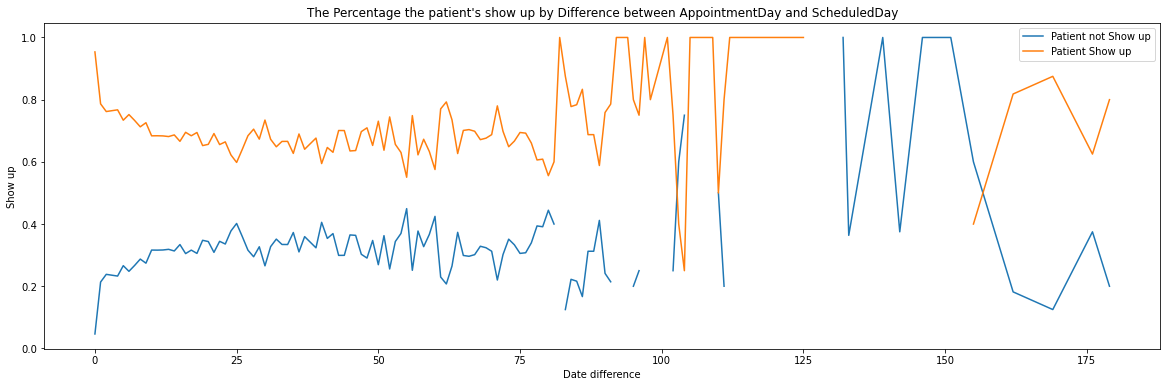

In [66]:
#Plotting the patient's show up by the dateDiff
total_time = df_Q9.groupby('datediff')['Patient_Showed'].count()
df_no9 = get_totalShowup(df_Q9, 'datediff', 'Patient_Showed == "No"')/total_time
df_yes9 = get_totalShowup(df_Q9, 'datediff', 'Patient_Showed == "Yes"')/total_time
plt.figure(figsize=(20,6))
df_no9.plot(label="Patient not Show up")
df_yes9.plot(label="Patient Show up")
plt.title("The Percentage the patient's show up by Difference between AppointmentDay and ScheduledDay")
plt.xlabel('Date difference')
plt.ylabel('Show up')
plt.legend();

> As we can see, the show up/no show up variable up and down in higher difference of time, so we can't say that there's a strong relation between the Date difference and the show up.  


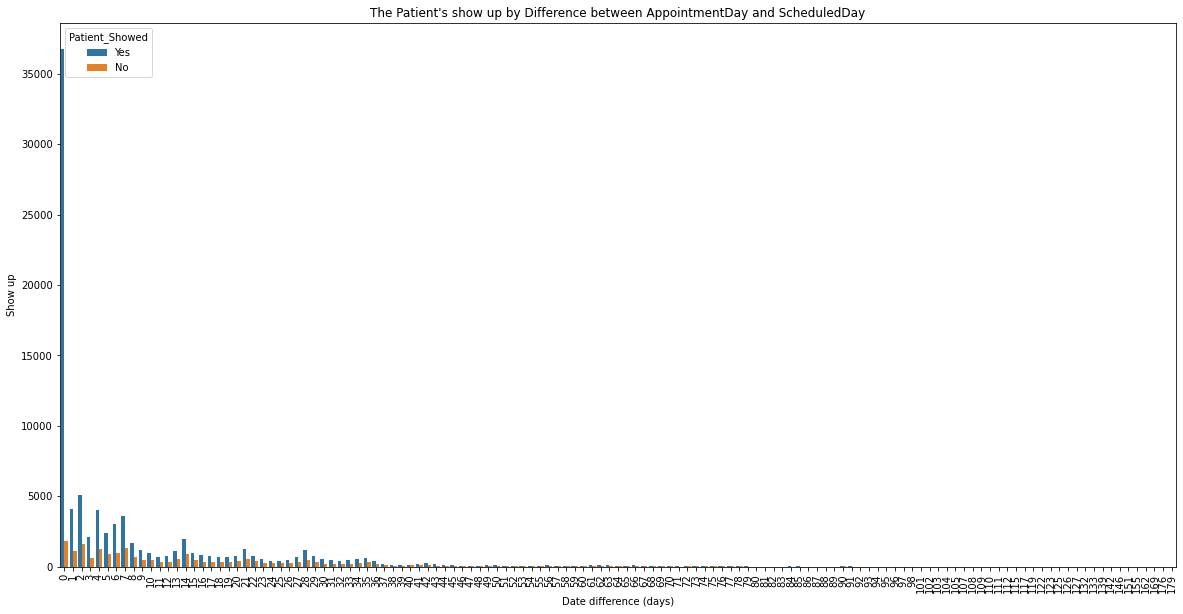

In [67]:
#Plotting the patient's show up by the dateDiff
plt.figure(figsize=(20,10))
sn.countplot(x=df_Q9['datediff'], hue=df_Q9['Patient_Showed'], data=df_Q9)
plt.title("The Patient's show up by Difference between AppointmentDay and ScheduledDay")
plt.xlabel('Date difference (days)')
plt.ylabel('Show up')
plt.xticks(rotation=90);

> As we see in chart, the patient show up to their medical appointment when the difference between AppointmentDay and ScheduledDay is less, while the patient don't show up when the difference is large.  
> Maybe because they forgot that they have a medical appointment, for that let's check if they receive SMS.

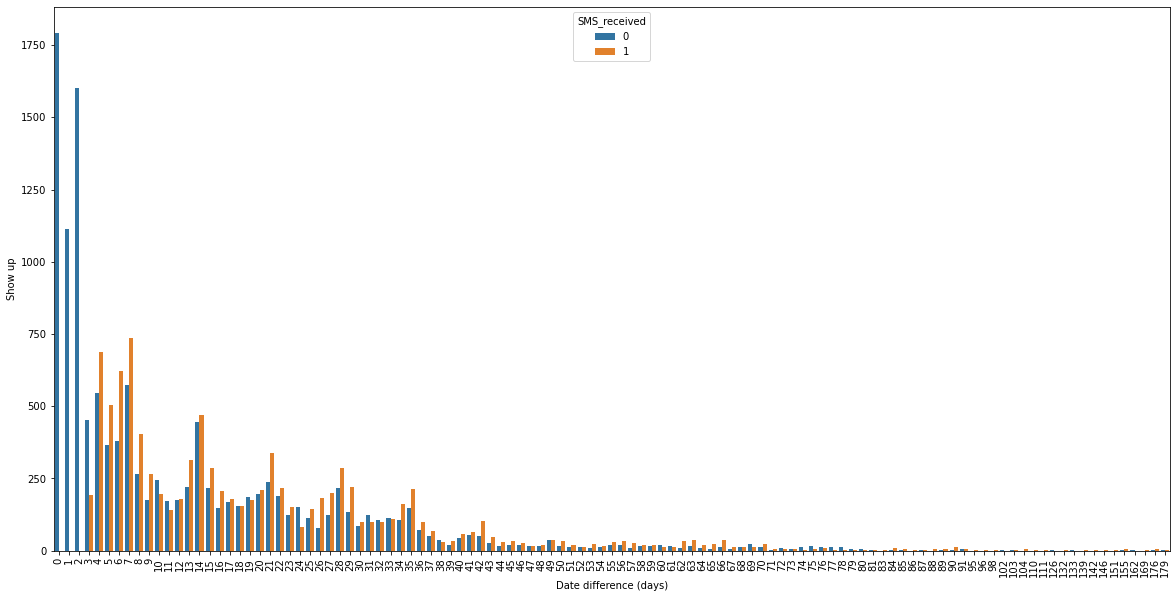

In [61]:
df_noshowed = df_Q9.query('Patient_Showed == "No"')[['SMS_received', 'datediff']]
plt.figure(figsize=(20,10))
sn.countplot(x=df_noshowed['datediff'], hue=df_noshowed['SMS_received'], data=df_noshowed)
plt.xlabel('Date difference (days)')
plt.ylabel('Show up')
plt.xticks(rotation=90);

> From the chart, we can conclude that while the difference between the AppointmentDay and ScheduledDay is large, the patients don't receive SMS to remind them for their appointment. 

<a id='conclusions'></a>
## Conclusions

* The Age and Gender are the main factors that affect the patient's show up for their medical appointment. As we noticed above, the number of old female who are caring to their health is greater then the number of other patient.  

* Having diseases affect the patient's show up. As we saw above patients who have diseases don't shown up to their medical appointment maybe because they can't move to hospital, they don't have tranport to get them to there. we need more dataset to explore the reasons behond that.  

* The difference between the AppointmentDay and ScheduledDay and SMS received affect the patient's show up. As we noticed above, the long difference between the two day and not receiving the SMS reminder leads to not show up of patient to their appointment.

## Limitations

* We need more indicators to explore why patients who don't have scholship show up to their medical appointment more than patien who have scholarship.

* We need more indicators about transport and how far the hospital to patients house.

* We need more indicators about situation fiancial and social about patients.

* We need more variety dataset, we need a pupolation where we have more old age patients, more patients who have diseases...etc.





## Web sites used :

* Kaggle
* stackoverflow